## Previous configuration

In [24]:
!pip install tensorflow opencv-python matplotlib

import tensorflow as tf
import os

# Set GPU Memory Consumption Growth (limit)
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

## Load data

In [25]:
import numpy as np
from matplotlib import pyplot as plt

data = tf.keras.utils.image_dataset_from_directory('data')
data_iterator = data.as_numpy_iterator()

Found 2515 files belonging to 36 classes.


In [26]:
batch = data_iterator.next()
print(batch[0].min())
print(batch[0].max())
#print(batch[0]) #batch[0]= img
print(batch[1]) #batch[1]= class

0.0
254.93652
[ 1  1  6 24  4 27  8 15 33 34  0  0  3 15 28 14 22 13 17  5 32  5 26 10
 30 34  2 12 15 14 16 18]


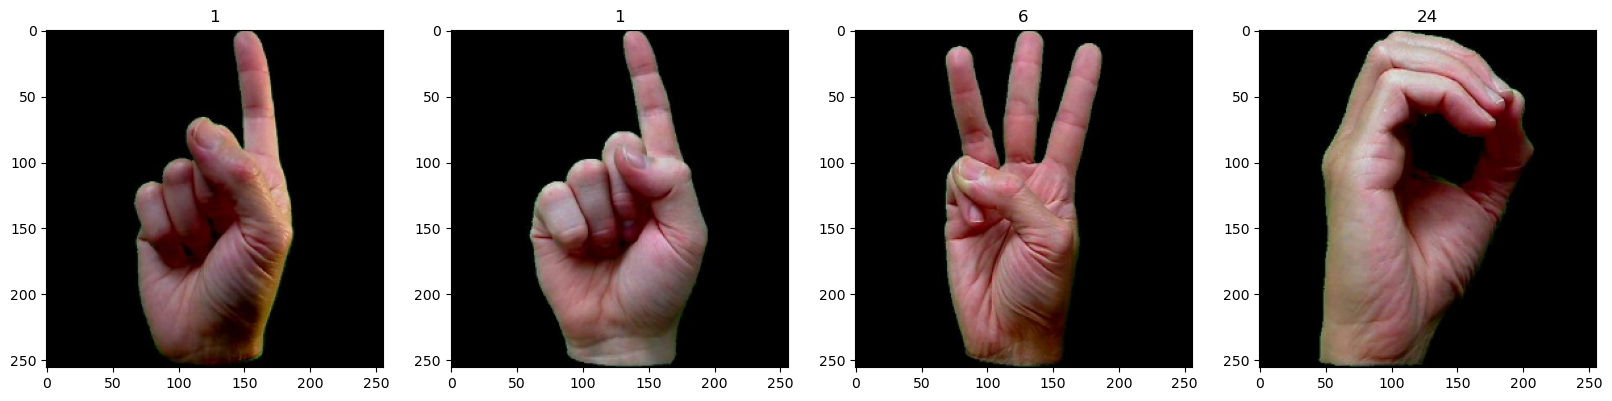

In [27]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## Procces data

In [28]:
num_classes = 36
data = data.map(lambda x, y: (x / 255, tf.one_hot(y, num_classes))) #Normalize
scale_data_iterator = data.as_numpy_iterator()
batch = scale_data_iterator.next()
print(batch[0].min())
print(batch[0].max())

0.0
1.0


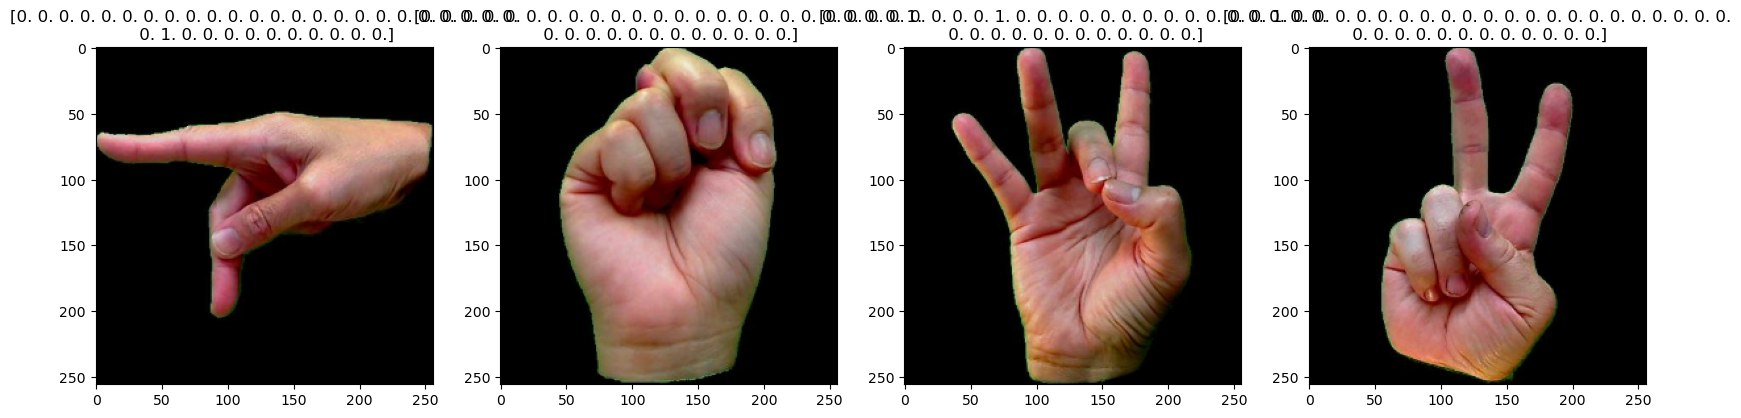

In [29]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [30]:
train_size = int(len(data)*.7) #Train 70%
val_size = int(len(data)*.2)+1 #Validation 20%
test_size = int(len(data)*.1)+1 #Test 10%

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

len(data)==train_size+val_size+test_size

True

## Model

In [31]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

input_shape = (256, 256, 3)
num_classes = 36

model = Sequential()

# Layers
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten(all in one vector)
model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))  # Regularization

model.add(Dense(num_classes, activation='softmax'))  # Output layer with 36 neurons for 36 classes. Softmax function for multiclass

# Compile (precharge)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Results

In [32]:
epochs = 10
train_steps = len(train)
val_steps = len(val)

#Fit
history = model.fit(train, epochs=epochs, steps_per_epoch=train_steps, validation_data=val, validation_steps=val_steps)

# Test the model
test_results = model.evaluate(test)

# Extracting results
training_loss = history.history['loss']
training_accuracy = history.history['accuracy']
validation_loss = history.history['val_loss']
validation_accuracy = history.history['val_accuracy']

Epoch 1/10


55/55 [==============================] - 39s 691ms/step - loss: 1.6427 - accuracy: 0.5568 - val_loss: 0.4430 - val_accuracy: 0.8750
Epoch 2/10
55/55 [==============================] - 38s 690ms/step - loss: 0.3244 - accuracy: 0.8960 - val_loss: 0.2185 - val_accuracy: 0.9512
Epoch 3/10
55/55 [==============================] - 37s 672ms/step - loss: 0.1433 - accuracy: 0.9545 - val_loss: 0.2153 - val_accuracy: 0.9512
Epoch 4/10
55/55 [==============================] - 37s 671ms/step - loss: 0.1025 - accuracy: 0.9653 - val_loss: 0.1411 - val_accuracy: 0.9512
Epoch 5/10
55/55 [==============================] - 39s 706ms/step - loss: 0.0825 - accuracy: 0.9733 - val_loss: 0.0828 - val_accuracy: 0.9727
Epoch 6/10
55/55 [==============================] - 39s 709ms/step - loss: 0.0597 - accuracy: 0.9824 - val_loss: 0.1537 - val_accuracy: 0.9609
Epoch 7/10
55/55 [==============================] - 44s 795ms/step - loss: 0.0412 - accuracy: 0.9864 - val_loss: 0.1125 - val_accuracy: 0.96

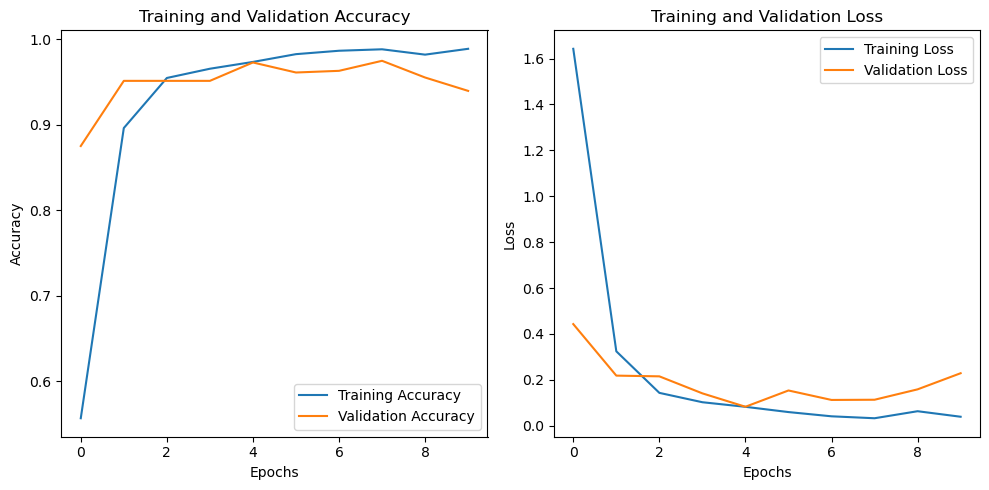

Test Loss: 0.20695006847381592
Test Accuracy: 0.9506173133850098


In [33]:
# Plotting the training and validation accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plotting the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Printing test results
print("Test Loss:", test_results[0])
print("Test Accuracy:", test_results[1])

In [39]:
import joblib

joblib.dump(value=model,filename="model.plk")

['model.plk']

In [41]:
model = joblib.load("model.plk")
data = tf.keras.utils.image_dataset_from_directory('test.jpg')

NotFoundError: Could not find directory test.jpg